<h1 style="font-size:3rem;color:blue;"> DAVE3625 Assignment 1 </h1>

s333592

In [1]:
import pandas as pd

In [29]:
import numpy as np
import matplotlib.pyplot as plt
import datetime

In [8]:
df = pd.read_excel(r'/Users/Sno/Downloads/Ruter_data.xls')
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,10:53:53,10:53:59,10:53:00,10:53:00,112,5
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,13:12:20,13:12:26,13:12:00,13:12:00,112,5
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,10:18:56,10:19:21,10:19:00,10:19:00,112,6
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,13:52:04,13:52:26,13:51:00,13:51:00,112,10
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,07:34:13,07:34:53,07:33:00,07:33:00,112,10


<h2 style="font-size:2rem;"> 1.1 Five Features </h2>

1. We can find time spent at each "Holdeplass" by substract the time the bus left "Holdeplass" with the time the bus arrived at "Holdeplass".
2. The capacity available can be extracted if the passengers is substracted to the vehicle capacity.
3. There are none travels between 01-05.
4. Arrival and departure are scheduled at the same time - which is impossible.
5. There cannot be a negative number of passengers.

<h3 style="font-size:3rem;"> 1.2 Feature Engineering Applied </h3>

In [22]:
df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra'], 
                                                               errors='coerce') 
df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra'], 
                                                                errors='coerce')
df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra'], 
                                                                errors='coerce')
df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'] = pd.to_datetime(df['Tidspunkt_Planlagt_Avgang_Holdeplass_Fra'], 
                                                                errors='coerce')

1. Beregner tid brukt på hver enkelt holdeplass. 

In [33]:
df['Tid_På_Holdeplass']=df['Tidspunkt_Faktisk_Avgang_Holdeplass_Fra']-df['Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra']
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Tid_Pa_Holdeplass,Tid_På_Holdeplass
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,NaT,NaT,NaT,NaT,112,5,NaT,NaT
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,NaT,NaT,NaT,NaT,112,5,NaT,NaT
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,NaT,NaT,NaT,NaT,112,6,NaT,NaT
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,NaT,NaT,NaT,NaT,112,10,NaT,NaT
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,NaT,NaT,NaT,NaT,112,10,NaT,NaT


2. Beregner tilgjengelig kapasitet på hvert kjøretøy.

In [35]:
df['Tilgjengelig_kapasitet']=df['Kjøretøy_Kapasitet']-df['Passasjerer_Ombord']
df.head()

,TurId,Dato,Fylke,Område,Kommune,Holdeplass_Fra,Holdeplass_Til,Linjetype,Linjefylke,Linjenavn,Linjeretning,Tidspunkt_Faktisk_Ankomst_Holdeplass_Fra,Tidspunkt_Faktisk_Avgang_Holdeplass_Fra,Tidspunkt_Planlagt_Ankomst_Holdeplass_Fra,Tidspunkt_Planlagt_Avgang_Holdeplass_Fra,Kjøretøy_Kapasitet,Passasjerer_Ombord,Tid_Pa_Holdeplass,Tid_På_Holdeplass,Tilgjengelig_kapasitet
0,15006-2020-08-10T10:24:00+02:00,2020-08-10,Viken,Vest,Bærum,Nordliveien,Tjernsmyr,Lokal,Viken,150,0,NaT,NaT,NaT,NaT,112,5,NaT,NaT,107
1,15002-2020-08-15T12:54:00+02:00,2020-08-15,Viken,Vest,Bærum,Nadderud stadion,Bekkestua bussterminal (Plattform C),Lokal,Viken,150,0,NaT,NaT,NaT,NaT,112,5,NaT,NaT,107
2,15004-2020-08-03T09:54:00+02:00,2020-08-03,Viken,Vest,Bærum,Ringstabekkveien,Skallum,Lokal,Viken,150,0,NaT,NaT,NaT,NaT,112,6,NaT,NaT,106
3,15003-2020-07-27T13:00:00+02:00,2020-07-27,Viken,Vest,Bærum,Gruvemyra,Gullhaug,Lokal,Viken,150,1,NaT,NaT,NaT,NaT,112,10,NaT,NaT,102
4,15002-2020-08-27T07:15:00+02:00,2020-08-27,Viken,Vest,Bærum,Lysaker stasjon (Plattform A),Tjernsmyr,Lokal,Viken,150,1,NaT,NaT,NaT,NaT,112,10,NaT,NaT,102


3. Ønsker å få feilmelding hvis "Passasjerer_Ombord" er et negativt tall.

In [41]:
df['Passasjerer_Ombord']
If (df['Passasjerer_Ombord']) < 0
print('Passasjerer_Ombord',"må være enten 0 eller større.")
df.head()

NameError: name 'If' is not defined

4. Viser de forskjellige linjenavnene, og frekvensen av de.

In [42]:
from scipy import stats
import seaborn as sns
import re

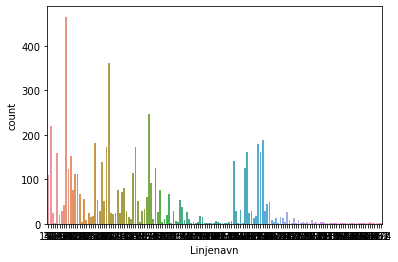

In [50]:
sns.countplot(x='Linjenavn', data=df);

5. Frekvensen i de ulike kommunene #Ruter dekker.

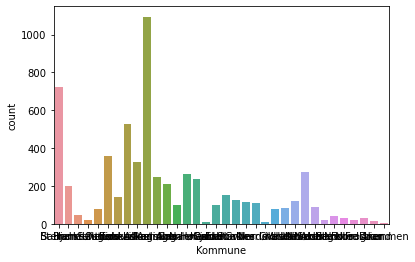

In [52]:
sns.countplot(x='Kommune', data=df);